Histograms are an incredibly valuable image analysis tool for computer vision as they help us understand the distribution of data associated with an image. The most common example being to show the range of intensity values.

Here we will first create histograms from grayscale and then color images, then explain how to understand and interpret these plots. Then also cover the topic of histogram equalization which can help improve the contrastin poorly iluminated images.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "gray"

## What histograms actually are?

In essence they are collected counts of data organized into bins of predefined width, we specify the number of bins along the x-axis to use, where a single bin represents a range of values this is most commonly pixel intensities.

A single bin could be from the range 0 to 9 or 10 to 19 and so on representing the values of pixel intensities from 0 to 255. Conversely along the y-axis we get the count of the number of pixels that match a given bin.

Text(0.5, 1.0, 'Histogram of Black Image')

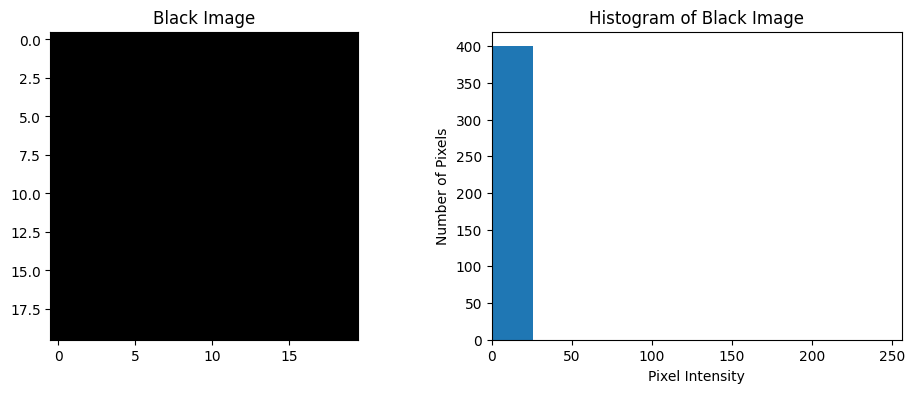

In [3]:
# Create a numpy array of 20x20x1 filled with zero values, equivalent to black grayscale image.
black_img = np.zeros([20, 20, 1])

# Flatten the image data into a single 1D array.
black_flatten = black_img.ravel()

# Display the image and histogram.
plt.figure(figsize=[18, 4])

plt.subplot(131); plt.imshow(black_img); plt.title("Black Image")

plt.subplot(132)
plt.hist(black_flatten, range=[0, 256])
plt.xlim([0, 256])
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.title("Histogram of Black Image")

## Create a histogram from a binary image

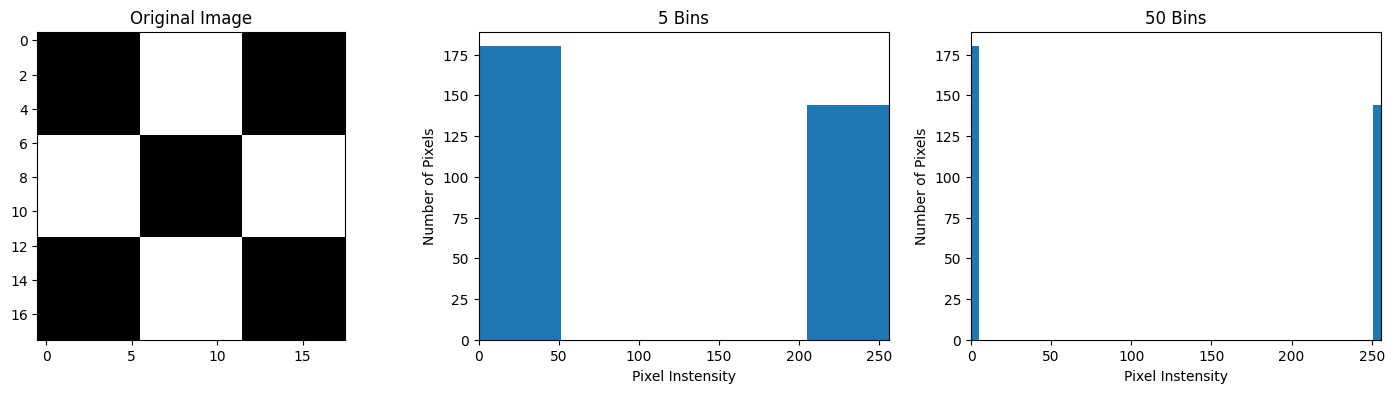

In [4]:
# Read the image.
img = cv2.imread("../module03/checkerboard_18x18.png", cv2.IMREAD_GRAYSCALE)

# Flatten the image data into a single 1D array.
img_flatten = img.ravel()

# Display the image and histograms.
plt.figure(figsize=[18, 4])

plt.subplot(131); plt.imshow(img); plt.title("Original Image")

plt.subplot(132)
plt.hist(img_flatten, 5, [0, 256])
plt.xlim([0, 256])
plt.xlabel("Pixel Instensity")
plt.ylabel("Number of Pixels")
plt.title("5 Bins")

plt.subplot(133)
plt.hist(img_flatten, 50, [0, 256])
plt.xlim([0, 256])
plt.xlabel("Pixel Instensity")
plt.ylabel("Number of Pixels")
plt.title("50 Bins");

## Create a histogram from a grayscale image (example 1)

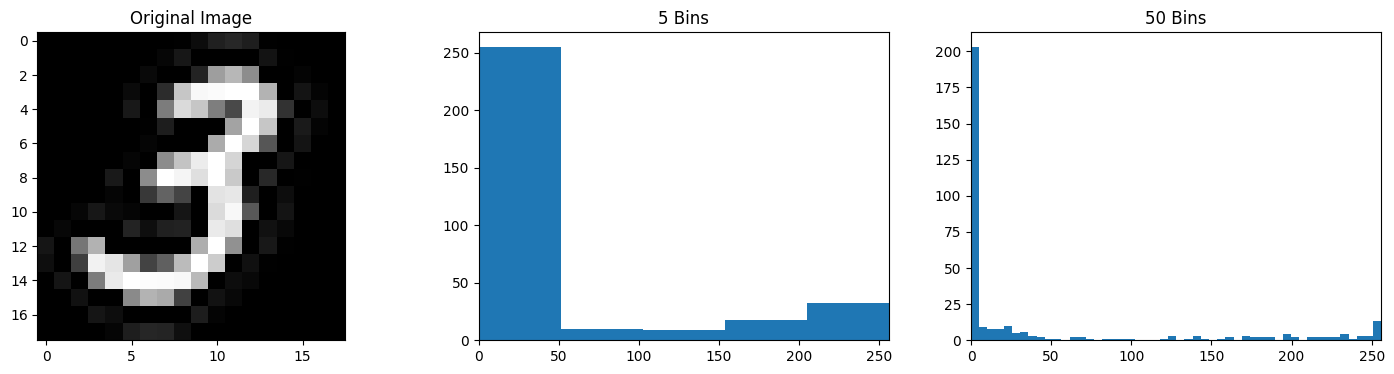

In [5]:
# Read the image.
img = cv2.imread("../module03/MNIST_3_18x18.png", cv2.IMREAD_GRAYSCALE)

# Flatten the image data into a single 1D array.
img_flatten = img.ravel()

# Display the image and histograms.
plt.figure(figsize=[18, 4])

plt.subplot(131); plt.imshow(img); plt.title("Original Image")
plt.subplot(132); plt.hist(img_flatten, 5, [0, 256]); plt.xlim([0, 256]); plt.title("5 Bins")
plt.subplot(133); plt.hist(img_flatten, 50, [0, 256]); plt.xlim([0, 256]); plt.title("50 Bins");

## Create a histogram from a grayscale image (example 2)

Histograms do not convey any spatial information, it's not like you read the histogram from left to right and it represents the source image from left to right it's truly just the intensity values across the entire image.

While I'm sort of guessing which peaks represent which parts of the original image.

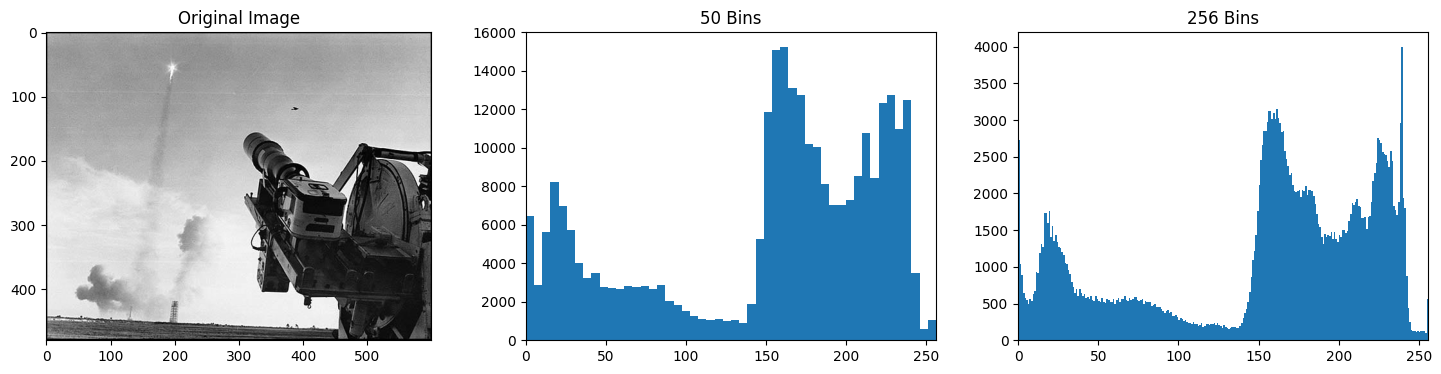

In [6]:
# Read the image.
img = cv2.imread("../module03/Apollo-8-Launch.jpg", cv2.IMREAD_GRAYSCALE)

# Flatten the image.
img_flatten = img.ravel()

# Display the image and histograms.
plt.figure(figsize=[18, 4])
plt.subplot(131); plt.imshow(img); plt.title("Original Image")
plt.subplot(132); plt.hist(img_flatten, 50, [0, 256]); plt.xlim([0, 256]); plt.title("50 Bins")
plt.subplot(133); plt.hist(img_flatten, 256, [0, 256]); plt.xlim([0, 256]); plt.title("256 Bins");

There is an OpenCV function that has some additional power features that can be very helpful for image analysis, **cv2.calcHist()**, it has a number of different arguments:

1. image
2. channels: Which channels to use.
3. mask: In order to do a histogram over part of the image.

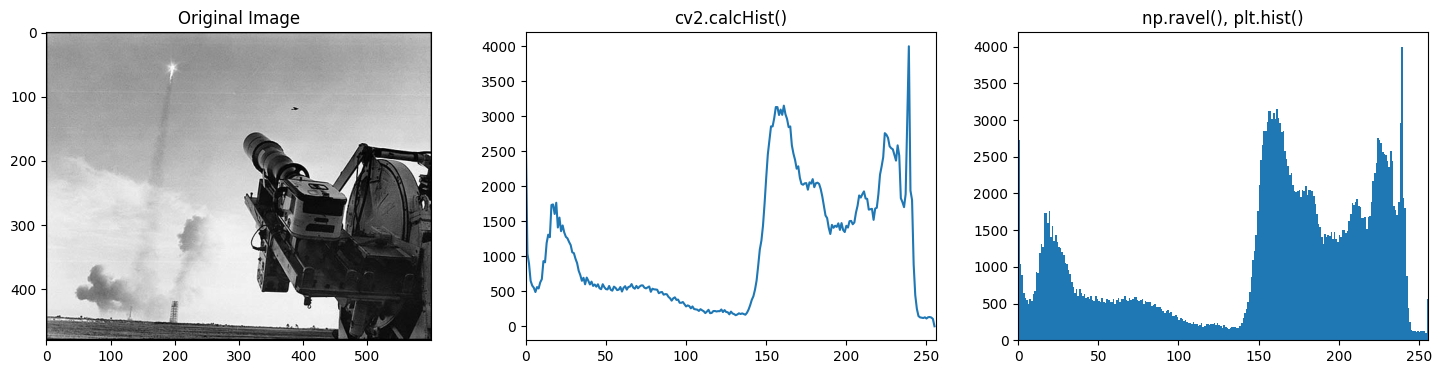

In [7]:
# Read the image.
img = cv2.imread("../module03/Apollo-8-Launch.jpg", 0)

# Use calcHist() in OpenCV.
# We pass the image in [] in order to make it the right data type.
# Grayscale image has only one channel (first channel) index of zero.
hist = cv2.calcHist(images=[img], channels=[0], mask=None, histSize=[256], ranges=[0, 255])

# Flatten the image.
img_flatten = img.ravel()

# Display the image and histograms.
plt.figure(figsize=[18, 4])
plt.subplot(131); plt.imshow(img); plt.title("Original Image")
plt.subplot(132); plt.plot(hist); plt.xlim([0, 256]); plt.title("cv2.calcHist()")
plt.subplot(133); plt.hist(img_flatten, 256, [0, 256]); plt.xlim([0, 256]); plt.title("np.ravel(), plt.hist()");

### What we can or cannot infer from histograms?

It's important to not make erroneous assumptions about your image processing or even try to identify two identical images based on histogram alone.

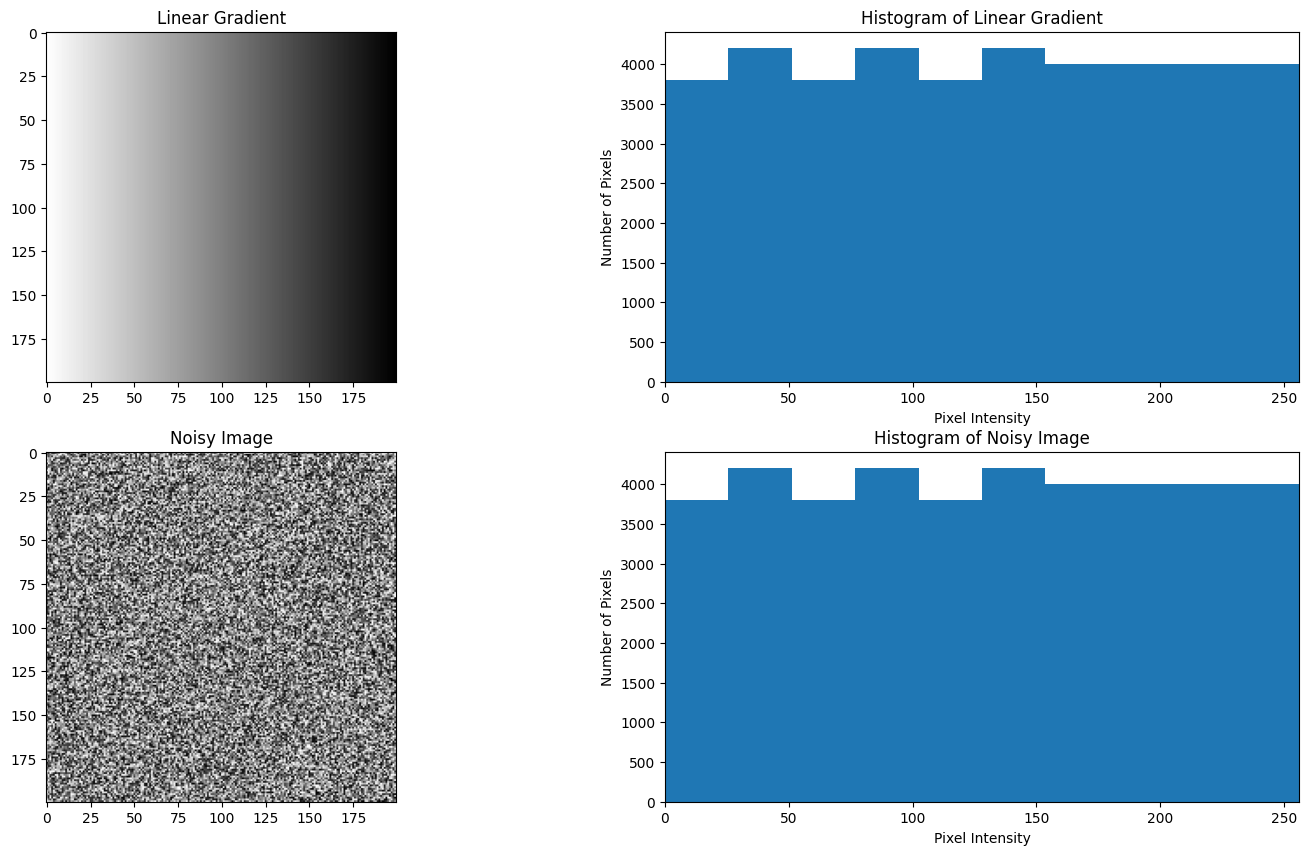

In [8]:
# different inages with identical histograms
# Load in the two gradient images.
img_gradient = cv2.imread("../module03/linear_graident.png", cv2.IMREAD_GRAYSCALE)
img_noisy = cv2.imread("../module03/noisy.png", cv2.IMREAD_GRAYSCALE)

# Flatten the image data into a single 1D arrays.
gradient_flatten = img_gradient.ravel()
noisy_flatten = img_noisy.ravel()

# Display the images and histograms.
plt.figure(figsize=[18, 10])

plt.subplot(221); plt.imshow(img_gradient); plt.title("Linear Gradient")

plt.subplot(222)
plt.hist(gradient_flatten, range=[0, 256])
plt.xlim([0, 256])
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.title("Histogram of Linear Gradient");

plt.subplot(223); plt.imshow(img_noisy); plt.title("Noisy Image")

plt.subplot(224)
plt.hist(noisy_flatten, range=[0, 256])
plt.xlim([0, 256])
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.title("Histogram of Noisy Image");

### Color Histograms

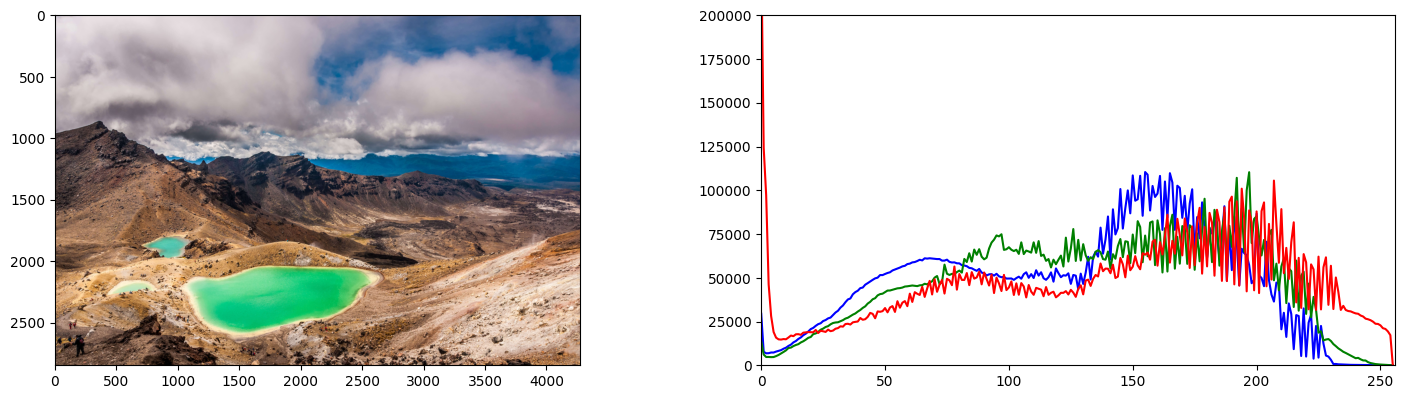

In [9]:
# Read the color images.
img = cv2.imread("../module03/Emerald_Lakes_New_Zealand.jpg")

# Compute histograms for each color channel for both images.
hist1 = cv2.calcHist([img], [0], None, [256], [0, 255])  # B
hist2 = cv2.calcHist([img], [1], None, [256], [0, 255])  # G
hist3 = cv2.calcHist([img], [2], None, [256], [0, 255])  # R

# Dsiaplay the images and histogram plots
plt.figure(figsize=[18, 10])
plt.subplot(221); plt.imshow(img[:, :, ::-1])

plt.subplot(222);
plt.plot(hist1, "b"); plt.plot(hist2, "g"); plt.plot(hist3, "r");
plt.xlim([0, 256]);
plt.ylim([0, 200000]);

### Using a mask with **calcHist()**

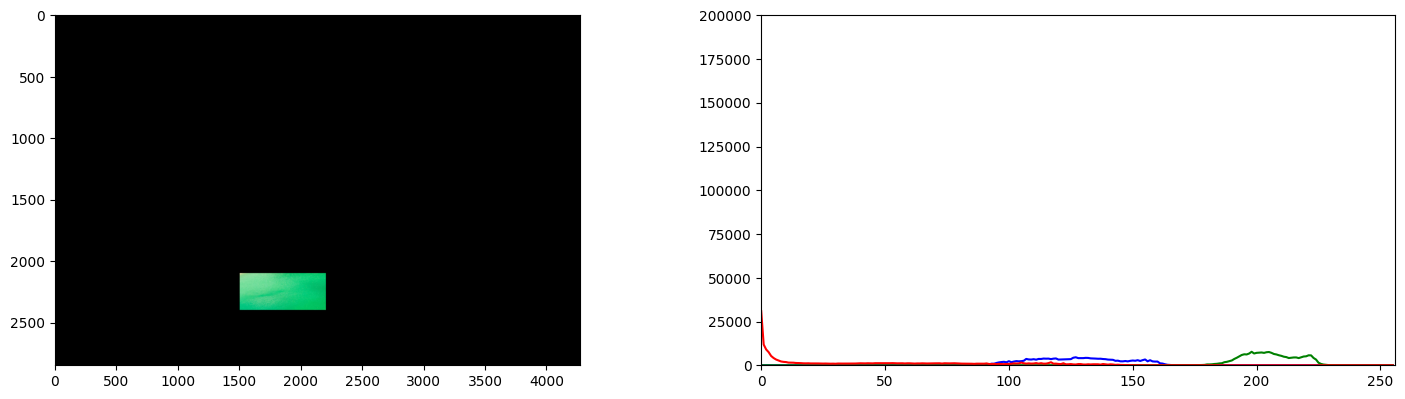

In [10]:
# Read the color images.
img = cv2.imread("../module03/Emerald_Lakes_New_Zealand.jpg", cv2.IMREAD_COLOR)

# Create a mask to filter the image for the histogram calculation.
mask_hist = np.zeros((img.shape[0], img.shape[1]), dtype="uint8")

# Select a region that isolates the green lake.
mask_hist[2100:2400, 1500:2200] = 255

# Create a similar mask to show the selected region in the image (for display purposes only).
# The mask must have the same number of color channels as the image, but each color channel will
# contain the same information.
mat = [mask_hist, mask_hist, mask_hist]
mask_3ch = cv2.merge(mat, 3)

# Create an image that only shows the selected region of interest (ROI).
img_roi = cv2.bitwise_and(img, mask_3ch)

# Compute histograms for each color channel for both images.
hist1_lake = cv2.calcHist([img], [0], mask_hist, [256], [0, 255])
hist2_lake = cv2.calcHist([img], [1], mask_hist, [256], [0, 255])
hist3_lake = cv2.calcHist([img], [2], mask_hist, [256], [0, 255])

# Display the imagaes and histograms plots.
plt.figure(figsize=[18, 10])
plt.subplot(223); plt.imshow(img_roi[:, :, ::-1])

plt.subplot(224); plt.plot(hist1_lake, "b"); plt.plot(hist2_lake, "g"); plt.plot(hist3_lake, "r")
plt.xlim([0, 256]); plt.ylim([0, 200000]);

### Histogram Equalization

What this is doing is taking a distribution of data and the reorganizing it to be an even spread.

Text(0.5, 1.0, 'Histogram')

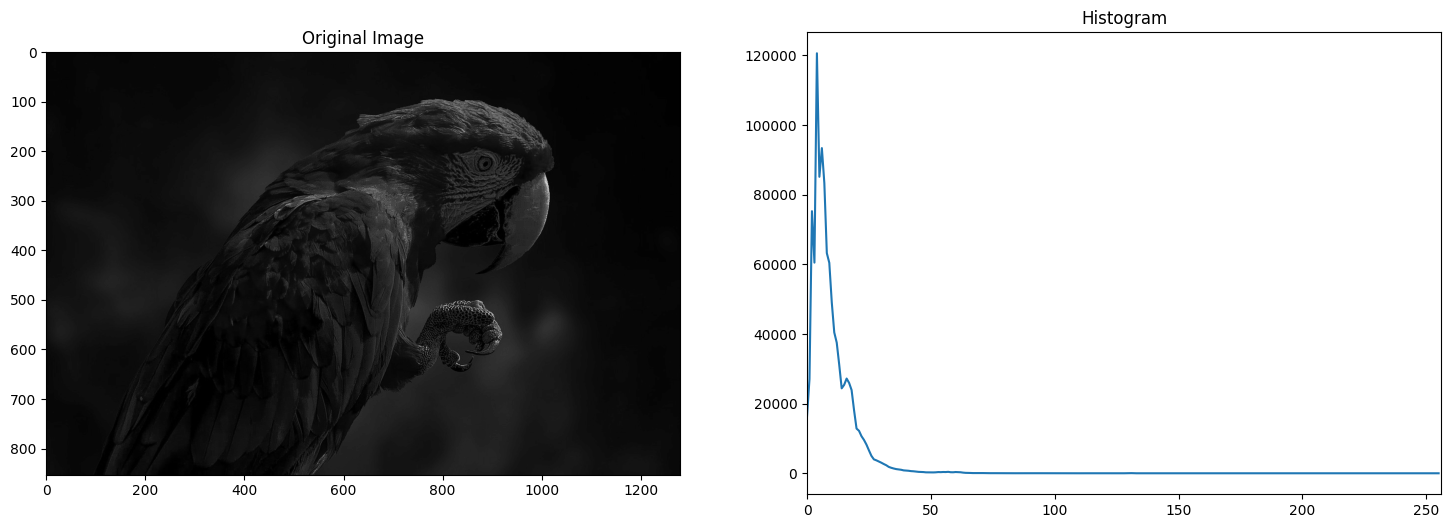

In [11]:
# Read the image in grayscale format.
img = cv2.imread("../module03/parrot.jpg", cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([img], [0], None, [256], [0, 255])

# Display the image.
plt.figure(figsize=[18, 6])
plt.subplot(121); plt.imshow(img); plt.title("Original Image")
plt.subplot(122); plt.plot(hist); plt.xlim([0, 256]); plt.title("Histogram")

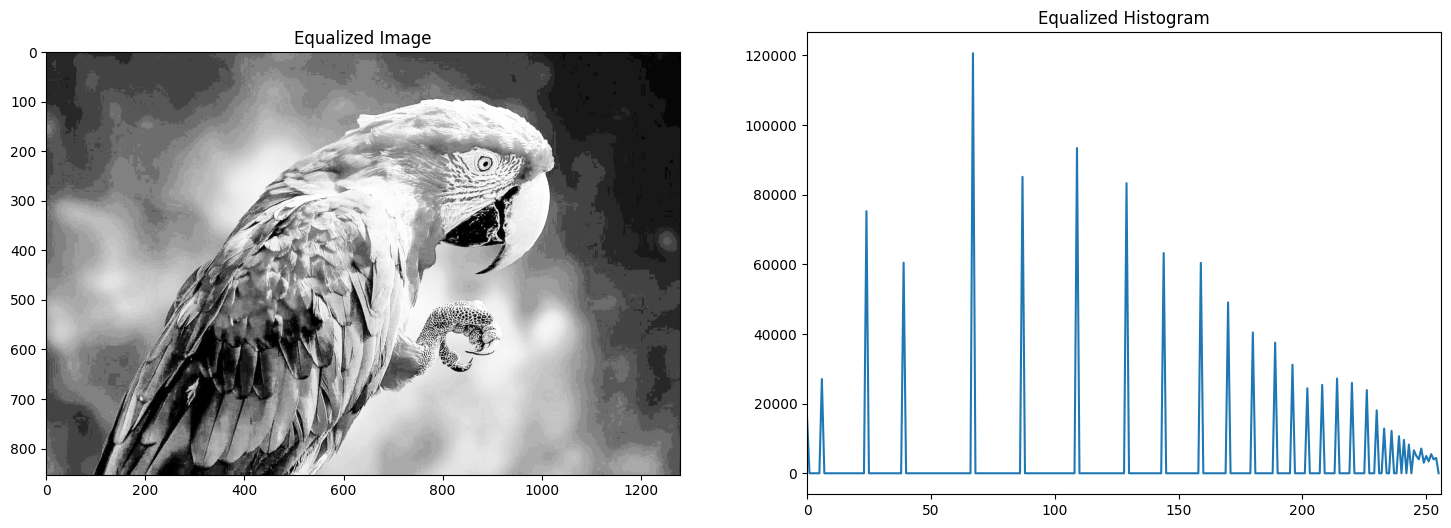

In [12]:
# Read the image in grayscale format.
img = cv2.imread("../module03/parrot.jpg", cv2.IMREAD_GRAYSCALE)

# Equalize histogram
img_eq = cv2.equalizeHist(img)

hist = cv2.calcHist([img_eq], [0], None, [256], [0, 255])

# Display the images.
plt.figure(figsize=[18, 6])
plt.subplot(121); plt.imshow(img_eq); plt.title("Equalized Image")
plt.subplot(122); plt.plot(hist); plt.xlim([0, 256]); plt.title("Equalized Histogram");

### Histogram Equalization for Color Images

For color images, we can not simply apply histogram equalization on the R, G, B channels separately. To understand why it is not a very good idea, let's take a look at an example.

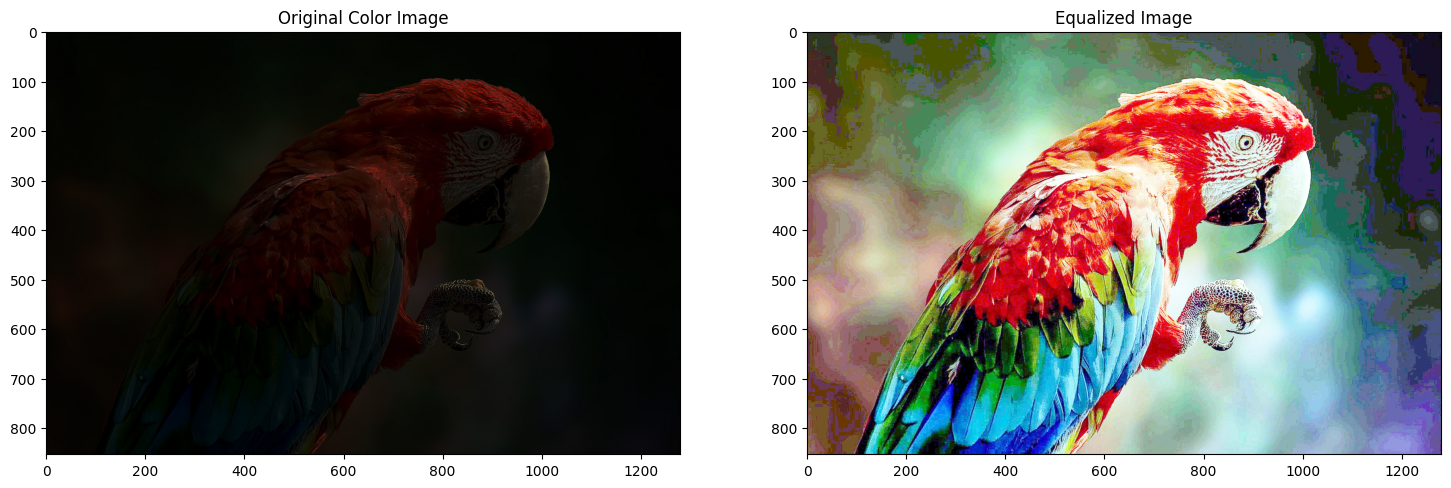

In [13]:
# Wrong Way
# Read color image.
img = cv2.imread("../module03/parrot.jpg", cv2.IMREAD_COLOR)
img_eq = np.zeros_like(img)

# Perform histogram equalization on each channel separately.
for i in range(0, 3):
    img_eq[:, :, i] = cv2.equalizeHist(img[:, :, i])

# Display the images.
plt.figure(figsize=[18, 6])
plt.subplot(121); plt.imshow(img[:, :, ::-1]); plt.title("Original Color Image")
plt.subplot(122); plt.imshow(img_eq[:, :, ::-1]); plt.title("Equalized Image");

### Right Way

We just saw that histogram equalization performed on the three channels separately leads to poor results. The reason is that when each color channel is non-linearly transformed independently, you can get completely new and unrelated colors.

The right way to perform histogram equalization on color images is to transform the images to a space like **HSV** color space where colors/hue/tint is separated from the intensity.

### WORKFLOW

1. Transform the image to HSV colorspace.
2. Perform histogram equalization only on the V channel.
3. Transform the image back to RGB colorspace.

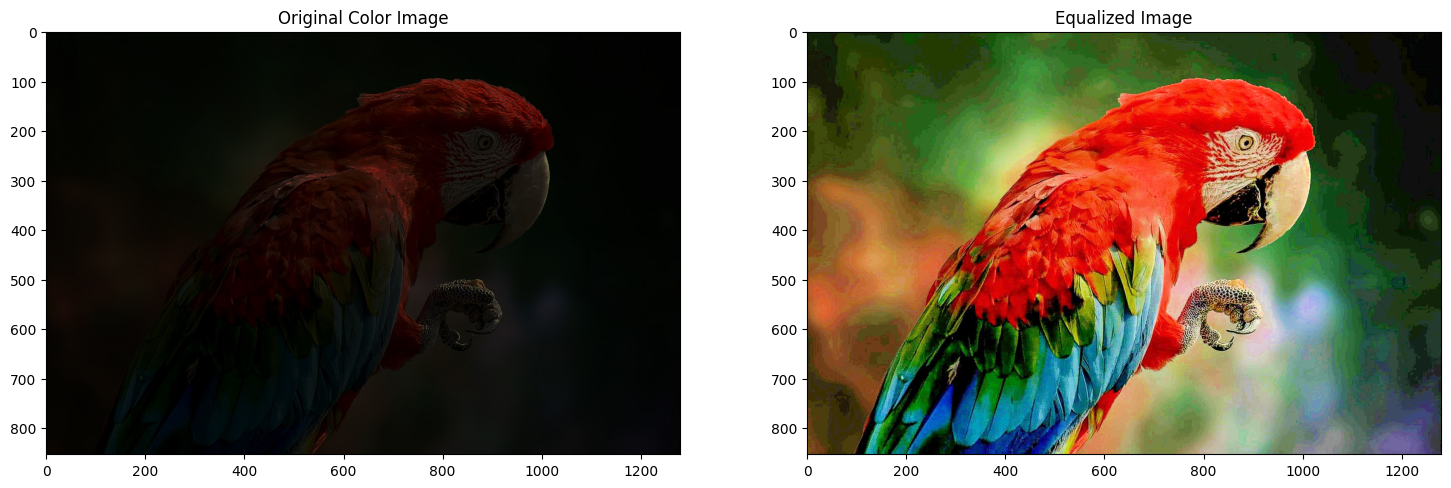

In [19]:
# Read the image to HSV colorspace.
img = cv2.imread("../module03/parrot.jpg", cv2.IMREAD_COLOR)

# Convert to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Perform histogram equalization only on the V channel, for value intensity.
img_hsv[:, :, 2] = cv2.equalizeHist(img_hsv[:, :, 2])

# Convert back to RGB format.
img_eq = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

# Display the images.
plt.figure(figsize=(18, 6))
plt.subplot(121); plt.imshow(img[:, :, ::-1]); plt.title("Original Color Image")
plt.subplot(122); plt.imshow(img_eq); plt.title("Equalized Image");

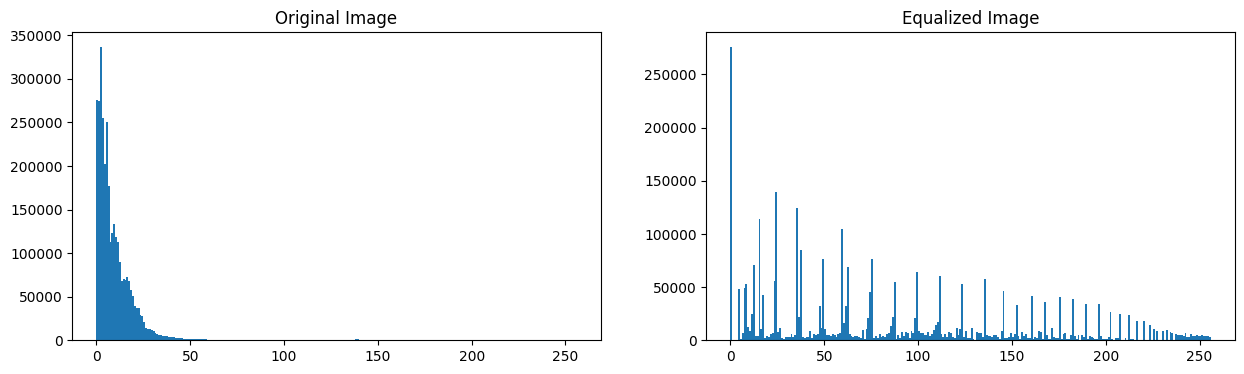

In [20]:
# Display the histogram
plt.figure(figsize=[15, 4])
plt.subplot(121); plt.hist(img.ravel(), 256, [0, 256]); plt.title("Original Image");
plt.subplot(122); plt.hist(img_eq.ravel(), 256, [0, 256]); plt.title("Equalized Image");